In [22]:
import pandas as pd
import numpy as np
import sympy as sym
import scipy as sci
from scipy import optimize
import matplotlib.pyplot as plt

In [23]:
def Std(a):
    sqr = np.sum((a - a.mean())**2)
    return np.sqrt(sqr/(len(a) - 1))

def Mean(a):
    mean = np.sum(a)/len(a)
    return mean

In [24]:
ambiental = pd.read_csv("Ambiental 1min.csv",sep=";")
bloqueos = pd.read_csv("Bloqueos 5min.csv",sep=";")
distanciafija = pd.read_csv("Distancia 5cm.csv",sep=";")
distanciavar = pd.read_csv("Distancias varias 1 min.csv",sep=";")

# Datos de ambiente

In [25]:
ambiental_5min = ambiental["Ambiente 5min"].to_numpy()
ambiental_5min

array([15, 14, 19, 14, 11], dtype=int64)

In [26]:
prom_ambiente = Mean(ambiental_5min)
prom_ambiente

14.6

In [27]:
un_ambiente = Std(ambiental_5min)
un_ambiente

2.8809720581775866

# Datos de distancia fija a diferentes tiempos

In [28]:
prom_distancia_fija = np.array([0.,0.,0.])
un_distancia_fija = np.array([0.,0.,0.])

In [29]:
distnacia_fija1min = distanciafija["1min"]
prom_distancia_fija1min = Mean(distnacia_fija1min)
std_distancia_fija1min = Std(distnacia_fija1min)

prom_distancia_fija[0] = prom_distancia_fija1min
un_distancia_fija[0] = std_distancia_fija1min

prom_distancia_fija1min,std_distancia_fija1min

(129.33333333333334, 10.016652800877813)

In [30]:
distnacia_fija3min = distanciafija["3min"]
prom_distancia_fija3min = Mean(distnacia_fija3min)
std_distancia_fija3min = Std(distnacia_fija3min)

prom_distancia_fija[1] = prom_distancia_fija3min
un_distancia_fija[1] = std_distancia_fija3min

prom_distancia_fija3min,std_distancia_fija3min

(381.6666666666667, 7.505553499465135)

In [31]:
distnacia_fija5min = distanciafija["5min"]
prom_distancia_fija5min = Mean(distnacia_fija5min)
std_distancia_fija5min = Std(distnacia_fija5min)

prom_distancia_fija[2] = prom_distancia_fija5min
un_distancia_fija[2] = std_distancia_fija5min

prom_distancia_fija5min,std_distancia_fija5min
mb,cov1 = np.polyfit([1,3,5],un_distancia_fija,1,cov=True)
mb[0],mb[1],np.sqrt(np.diag(cov1))

(-1.254163200219453, 11.269891700772671, array([0.00080047, 0.00273412]))

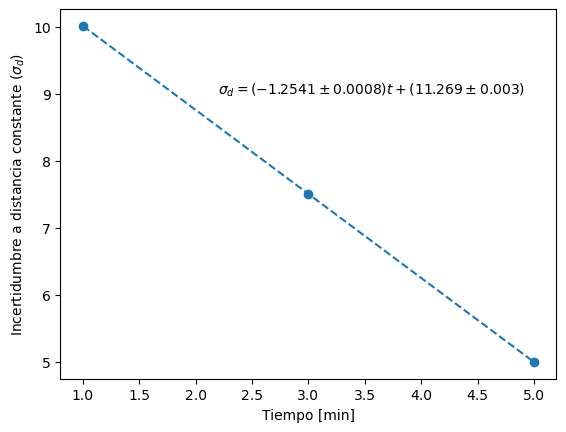

In [32]:
plt.scatter([1,3,5],un_distancia_fija)
xlinspace = np.linspace(1,5)
ylinspace = mb[0]*xlinspace+ mb[1]
plt.plot(xlinspace,ylinspace,"--")
plt.xlabel("Tiempo [min]")
plt.ylabel(r"Incertidumbre a distancia constante ($\sigma_d$)")
plt.text(2.2,9,r"$\sigma_d = (-1.2541 \pm 0.0008)t + (11.269 \pm 0.003)$")
plt.savefig("incertidumbrevstiempo.pdf")


# Datos a distancia variante y mismos tiempos

In [33]:
distancias = np.array([2.,4.,6.,8.,10.])
counts = np.zeros_like(distancias)
std = np.zeros_like(distancias)
j = 0
for i in distancias:
    counts[j] = Mean(distanciavar["%s cm"%(int(i))].to_numpy())
    std[j] = Std(distanciavar["%s cm"%(int(i))].to_numpy())
    j +=1 
    
counts,std

(array([355.  , 173.75, 100.  ,  61.75,  44.25]),
 array([11.10555417, 21.42234036, 12.27463509,  3.20156212,  2.62995564]))

(array([779.11298838, -30.94746568]), array([21.20888784,  5.73740818]))

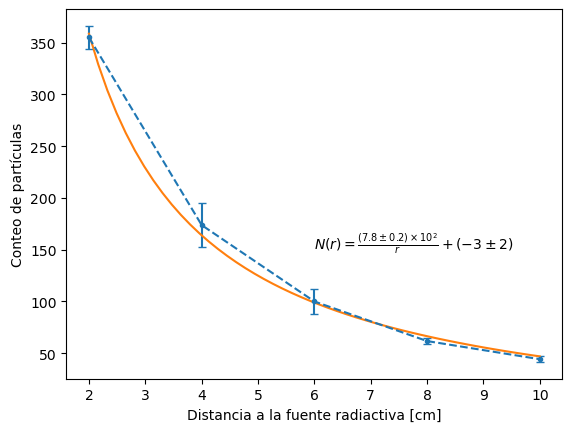

In [34]:
plt.errorbar(distancias,counts,yerr=std,capsize=3,fmt=".--")
plt.ylabel("Conteo de partículas")
plt.xlabel("Distancia a la fuente radiactiva [cm]")

def overR(x,a,b):
    return a/x + b


param,cov = optimize.curve_fit(overR,distancias,counts)

r = np.linspace(distancias[0],distancias[-1])
y = overR(r,param[0],param[1])
plt.plot(r,y)
plt.text(6,150,r"$N(r) = \frac{(7.8 \pm 0.2)\times10^2}{r} + (-3 \pm 2 )$")
plt.savefig("distnacia_var.pdf")
param,np.sqrt(np.diag(cov))

# Intento de ajuste $\frac{A}{r^2} + B$

(array([1227.75923731,   57.10189715]), array([145.70141827,  16.93173307]))

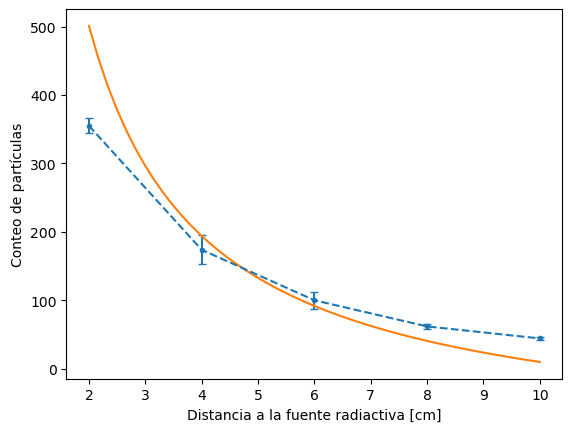

In [35]:
def overRsqr(x,a,b):
    return a/x**2 + b 

plt.errorbar(distancias,counts,yerr=std,capsize=3,fmt=".--")
plt.ylabel("Conteo de partículas")
plt.xlabel("Distancia a la fuente radiactiva [cm]")
param,cov = optimize.curve_fit(overRsqr,distancias,counts)

r = np.linspace(distancias[0],distancias[-1])
y = overR(r,param[0],param[1])
plt.plot(r,y-170)
param,np.sqrt(np.diag(cov))

# Datos con los bloqueadores de emisión

In [36]:
plomo = bloqueos["Plomo"].to_numpy()
alumnio = bloqueos["Aluminio"].to_numpy()
papel = bloqueos["Papel"].to_numpy()
nada = distnacia_fija5min.to_numpy()

data = [plomo,alumnio,nada,papel]
data,Std(data[0]),Std(data[1]),Std(data[2]),Std(data[3])

([array([128, 131, 102, 129], dtype=int64),
  array([282, 260, 264, 314], dtype=int64),
  array([650, 645, 640], dtype=int64),
  array([780, 725, 774, 751], dtype=int64)],
 13.723459233492601,
 24.60352278299458,
 5.0,
 25.01332977967281)

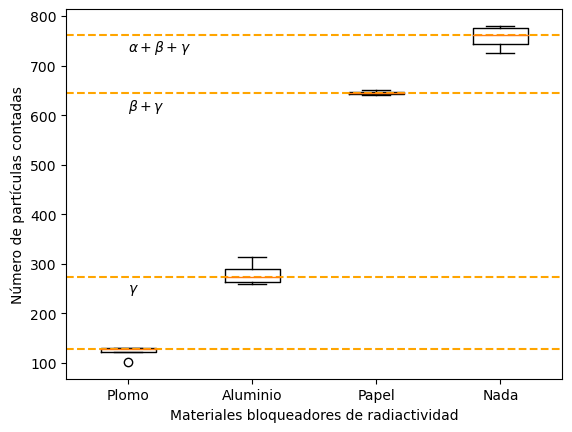

In [37]:
plt.boxplot(data,labels=["Plomo","Aluminio","Papel","Nada"])
plt.axhline(linestyle="--",y=128,color="orange")
plt.axhline(linestyle="--",y=273,color="orange")
plt.axhline(linestyle="--",y=762,color="orange")
plt.axhline(linestyle="--",y=645,color="orange")

plt.ylabel("Número de partículas contadas")
plt.xlabel("Materiales bloqueadores de radiactividad")
plt.text(1,730,r"$ \alpha + \beta + \gamma$")
plt.text(1,610,r"$ \beta + \gamma$")
plt.text(1,243,r"$ \gamma$")
0

plt.savefig("block.pdf")

# Cálculo el tiempo de vida medio

Teniendo en cuenta la fórmula 
$$\tau = \frac{\displaystyle \int_{0}^{\infty} t N(t)\  \text{d} t}{\displaystyle \int_{0}^{\infty} N(t)\  \text{d} t}$$
su versión discreta es 
$$\tau = \frac{\displaystyle\sum_{i=1}^{n}t_iN_i}{\displaystyle\sum_{i=1}^{n}N_i}$$

In [40]:
t = np.array([1., 3., 5.]) # min 
N = prom_distancia_fija # particulas
a,cov2 = np.polyfit(t,N,1)
N,t

(array([129.33333333, 381.66666667, 645.        ]), array([1., 3., 5.]))

In [42]:
N@t/np.sum(N)

3.8921568627450984

In [44]:
un_distancia_fija@t/np.sum(un_distancia_fija)

2.5545149765543687